# Proposal
## Diagnosing Cornary Artery Dieasse using KNN Classification

### Introduction
The most prevalent type of heart disease in the world is known as Coronary Artery Disease (CAD) (CDC, 2021). The most common symptom of CAD is angina, often described as chest pain and discomfort, emerging as the most prevalent symptom of coronary artery disease (CAD). However, individuals often overlook these symptoms until they experience their first heart attack, which serves as the initial indication of coronary artery disease (CAD).With time, CAD has the potential to weaken the heart muscle, potentially resulting in heart failure—a severe condition in which the heart's ability to pump blood efficiently is compromised . Common process to diagnose CAD are electrocardiograms, echocardiograms, exercise stress tests, chest X-rays, cardiac catheterizations, coronary angiograms, and coronary artery calcium scans, however, they may carry risks such as exposure to radiation, potential allergic reactions to contrast agents, and invasive procedures that could lead to complications (CDC, 2021).

### Question
Given the cholesterol level, resting blood pressure, sex, age, and type of chest pain predict the diagnosis of the individual if they have CAD using a KNN classification?


### Data Set
The dataset that will be used to answer the question consists of clinical and non-invasive tests of 303 patients who underwent angiography at Cleveland Clinic in Cleveland (Detrano et al., 1989).

### Preliminary Exploratory Data Analysis


In [31]:
# Set the seed for reproducibility
set.seed(7)

#importing the data, filling in the column names
process_data_cleveland<-read_delim("https://raw.githubusercontent.com/stephenDSCI/Heart-Disease-/main/processed.cleveland.data", delim=",", col_names = FALSE)|>
rename(
    age = X1,
    sex = X2,
    cp=X3,
    trestbps = X4,
    chol = X5,
    fbs= X6,
    restecg  =X7,
    thalach =X8,
    exang=X9,
    oldpeak=X10,
    slope=X11,
    ca =X12,
    thal=X13,
    num =X14)


#converting missing values that are ? into "NA"
process_data_cleveland[process_data_cleveland == "?" ] <- NA


#changing the data type,renaming Sex as Male or Female, Renaming CP (chest pain type) into 4 types 1="Typical Angina", 2="Atypical Angina, 3="Atypical chest pain", 4= "Asymtomatic")

cleveland_data_1<-process_data_cleveland|>
                    mutate(sex= as.factor(sex),
                           cp= as.factor(cp),
                           fbs= as.factor(fbs),
                           restecg= as.factor(restecg),
                           exang= as.factor(exang),
                           thal= as.factor(thal),
                           ca= as.factor(ca),
                           slope= as.factor(slope))|>
                    mutate(sex= fct_recode(sex,"Male" = "1", "Female" = "0"))|>
                    mutate(cp= fct_recode(cp,"Typical Angina"="1", "Atypical Angina"="2","Non-Anginal Pain"="3","Asymptomatic"="4"))
                 


#making a new column called diagnosis (If the corresponding value in the "num" column is NA, the value in the "diagnosis" column will be NA.
#If the value in the "num" column is greater than 0, the value in the "diagnosis" column will be TRUE; otherwise, it will be FALSE.)
# makes the classification into two categories


cleveland_data_renamed<-cleveland_data_1|>
    mutate(diagnosis=ifelse(is.na(num),NA,(num > 0)))|>
    mutate(diagnosis=as.factor(diagnosis))|>
    select(-num)


cleveland_data_renamed

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>
63,Male,Typical Angina,145,233,1,2,150,0,2.3,3,0.0,6.0,FALSE
67,Male,Asymptomatic,160,286,0,2,108,1,1.5,2,3.0,3.0,TRUE
67,Male,Asymptomatic,120,229,0,2,129,1,2.6,2,2.0,7.0,TRUE
37,Male,Non-Anginal Pain,130,250,0,0,187,0,3.5,3,0.0,3.0,FALSE
41,Female,Atypical Angina,130,204,0,2,172,0,1.4,1,0.0,3.0,FALSE
56,Male,Atypical Angina,120,236,0,0,178,0,0.8,1,0.0,3.0,FALSE
62,Female,Asymptomatic,140,268,0,2,160,0,3.6,3,2.0,3.0,TRUE
57,Female,Asymptomatic,120,354,0,0,163,1,0.6,1,0.0,3.0,FALSE
63,Male,Asymptomatic,130,254,0,2,147,0,1.4,2,1.0,7.0,TRUE


In [20]:
cleveland_split <- initial_split(cleveland_data_renamed, prop = 3/4, strata = diagnosis)
cleveland_training <- training(cleveland_split)
cleveland_testing <- testing(cleveland_split)
head(cleveland_training)
     

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>
63,Male,Typical Angina,145,233,1,2,150,0,2.3,3,0.0,6.0,FALSE
37,Male,Non-Anginal Pain,130,250,0,0,187,0,3.5,3,0.0,3.0,FALSE
41,Female,Atypical Angina,130,204,0,2,172,0,1.4,1,0.0,3.0,FALSE
56,Male,Atypical Angina,120,236,0,0,178,0,0.8,1,0.0,3.0,FALSE
57,Male,Asymptomatic,140,192,0,0,148,0,0.4,2,0.0,6.0,FALSE
56,Female,Atypical Angina,140,294,0,2,153,0,1.3,2,0.0,3.0,FALSE


In [37]:
cleveland_summary <- cleveland_training |>
                    group_by(diagnosis) |>
                    summarize(
                              min_chol = min(chol), max_chol = max(chol), mean_chol = mean(chol),  
                              min_trestbps = min(trestbps), max_trestbps = max(trestbps), mean_trestbps = mean(trestbps),
                                min_age = min(age), max_age = max(age), mean_age = mean(age), 
                        
                        n_of_patients = n())

cleveland_summary

diagnosis,min_chol,max_chol,mean_chol,min_trestbps,max_trestbps,mean_trestbps,min_age,max_age,mean_age,n_of_patients
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
FALSE,126,394,239.4146,94,178,128.9756,29,76,51.78862,123
TRUE,131,409,249.6635,100,200,134.1346,35,70,56.78846,104


In [49]:
plot1 <- ggplot(cleveland_training, aes(x = trestbps, y = age, color = diagnosis)) +
                 geom_point() +
                 labs(x = "Resting Blood Pressure(mm Hg)", y = "Cholesterol (mg/dl)", color = "diagnosis") +
                 scale_color_brewer(palette = "Set1")

plot2 <- ggplot(cleveland_training, aes(x = age, y = chol, color = diagnosis)) +
                 geom_point() +
                 labs(x = "Age (years)", y = "Cholesterol (mg/dl)", color = "diagnosis") +
                 scale_color_brewer(palette = "Set1")


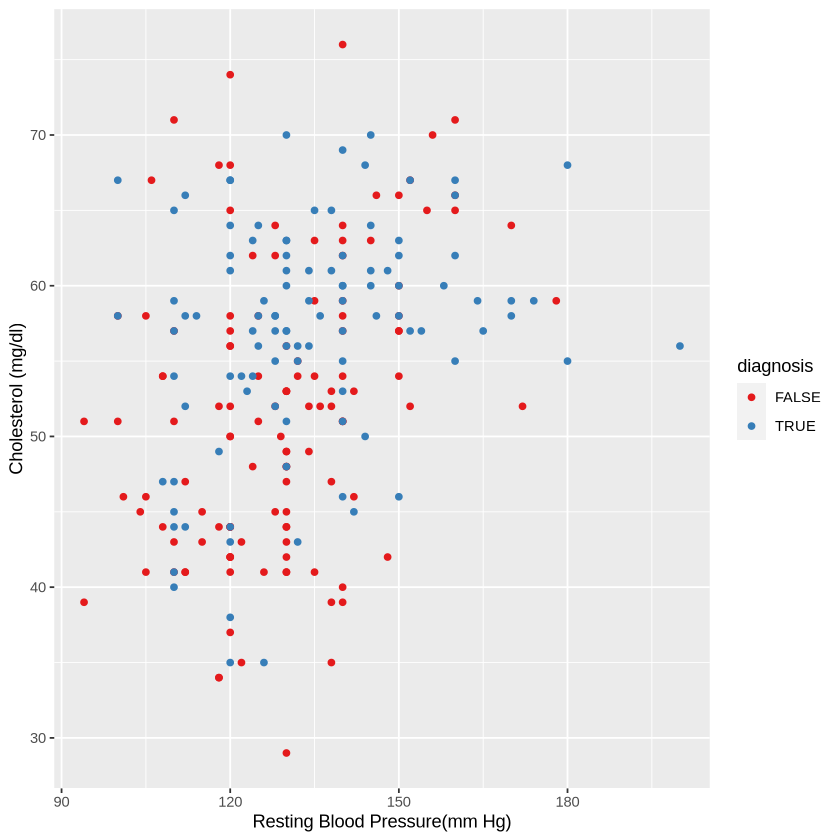

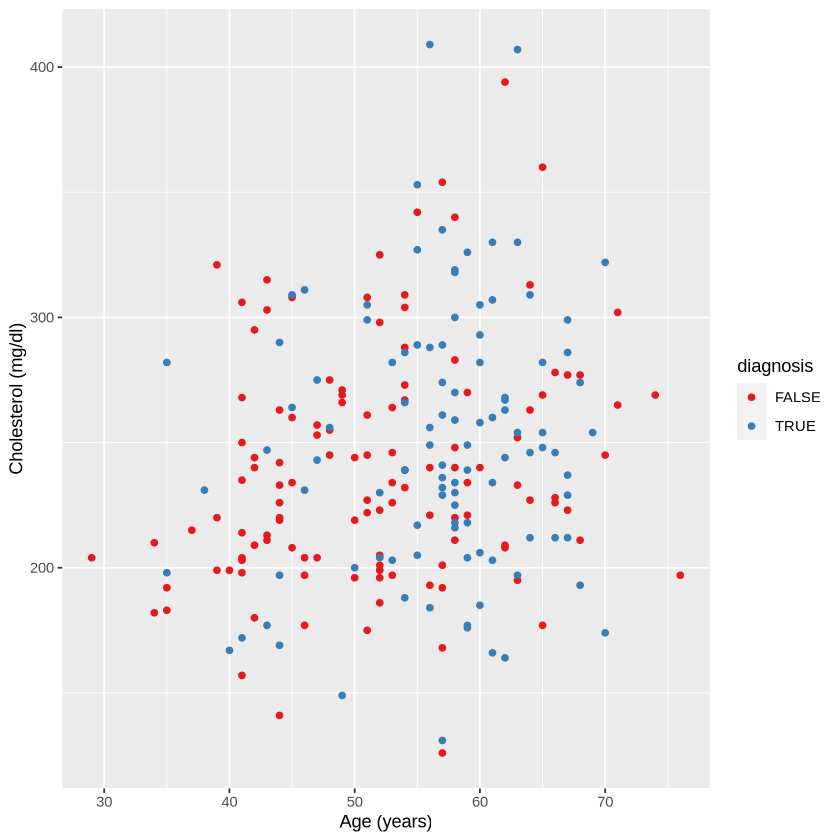

In [50]:
plot1
plot2

### Plot 1: 

This scatterplot graphs resting blood pressure (mmHg) on the X-axis and cholesterol on the Y-axis. The graph shows patients who have CAD have higher cholesterol levels and resting blood pressure levels whereas, patients who are not diagnosed with CAD have lower cholesterol levels and resting blood pressure. 

### Plot 2

For this graph, we see a larger density of diagnosed patients for heart disease towards the right, indicating that age has a correlation with cholesterol levels.  



### Methods
Our analysis will investigate the variables that are strong predictors of heart disease; age, blood pressure level, cholesterol level, sex, and the presence of chest pain are considered risk factors for Coronary Artery Disease (CAD), impacting both the probability and severity of its development (CDC, 2021; Coronary Artery Disease, n.d.; Brown et al., 2024).

When building our classification model, we will first divide the data into training data (75%) and testing data (25%). 

We will use scatterplots to look at the relationship between two of our variables, making several scatterplots to see any cross-correlational relationships. Before putting our data into the scatterplot, we will make sure to standardize all data so that no specific variable has a greater weighting. 
Before classifying, we will also tune our K-nearest classifier by cross-validating. We will then test this model on our testing data and make sure it is of optimal accuracy by looking into our metrics and confusion matrix.

### Expected Outcomes and Significance
From our analysis, we expect to find the relationship between age, sex, cholesterol levels, chest pain and resting blood pressure with the increased risk of heart disease. The impact of our analysis could be a more efficient and streamlined way of detecting possible heart disease by just running patient data from general health checkups to find early indicators of heart disease. This is important because the earlier heart disease is detected, the earlier it can be treated and risk of complications decrease. 

With further analysis and heart disease data learning, a better classification could be developed which will be able to look into other variables that could have a relationship with heart disease, giving us a more accurate and nuanced way to help patients with elevated risk for heart diseas. 

.

## References

Brown, J. C., Gerhardt, T. E., & Kwon, E. (2024). Risk factors for coronary artery disease. In StatPearls. StatPearls Publishing. http://www.ncbi.nlm.nih.gov/books/NBK554410/

CDC. (2021, July 19). Coronary Artery Disease | cdc.gov. Centers for Disease Control and Prevention. https://www.cdc.gov/heartdisease/coronary_ad.htm

Coronary artery disease. (n.d.). Heart and Stroke Foundation of Canada. Retrieved March 9, 2024, from https://www.heartandstroke.ca/en/heart-disease/conditions/coronary-artery-disease/

Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J. J., Sandhu, S., Guppy, K. H., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. The American Journal of Cardiology, 64(5), 304–310. https://doi.org/10.1016/0002-9149(89)90524-9

